In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("Walmart DataSet\Walmart DataSet.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [5]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
sales = df.groupby(['Date'])['Weekly_Sales'].sum().reset_index()
sales

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30
...,...,...
138,2012-09-28,43734899.40
139,2012-10-05,47566639.31
140,2012-10-12,46128514.25
141,2012-10-19,45122410.57


In [8]:
sales_by_date_store = df.groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index()
sales_by_date_store

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
...,...,...,...
6430,45,2012-09-28,713173.95
6431,45,2012-10-05,733455.07
6432,45,2012-10-12,734464.36
6433,45,2012-10-19,718125.53


In [9]:
sales_for_store22 = sales_by_date_store[sales_by_date_store['Store'] == 20]
sales_for_store22

,Store,Date,Weekly_Sales
2717,20,2010-02-05,2401395.47
2718,20,2010-02-12,2109107.90
2719,20,2010-02-19,2161549.76
2720,20,2010-02-26,1898193.95
2721,20,2010-03-05,2119213.72
...,...,...,...
2855,20,2012-09-28,2008350.58
2856,20,2012-10-05,2246411.89
2857,20,2012-10-12,2162951.36
2858,20,2012-10-19,1999363.49


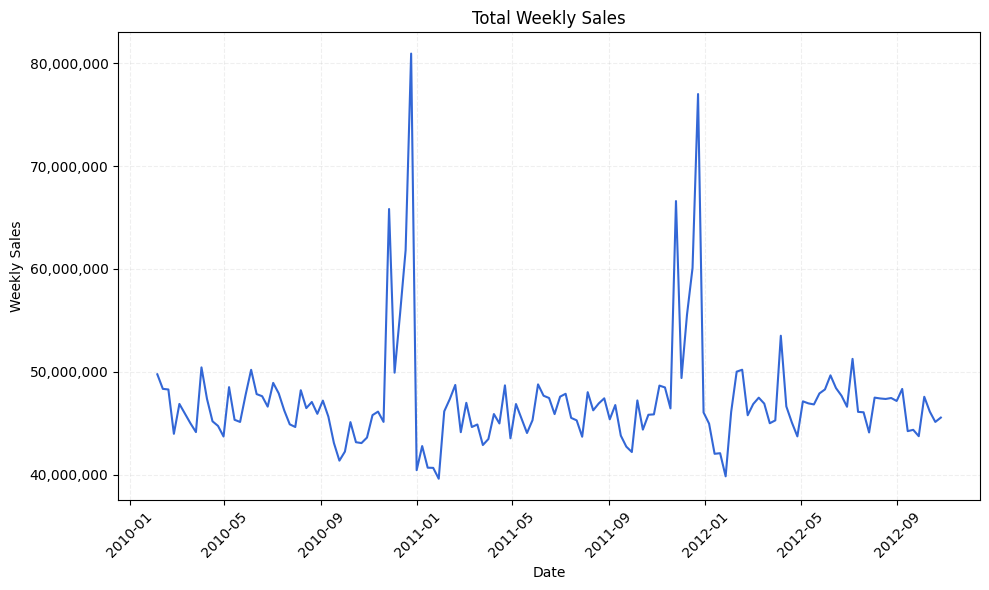

In [10]:
plt.figure(figsize=(10, 6))

# Plot the line graph
plt.plot(sales['Date'], sales['Weekly_Sales'], color='#3367d6')

# labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Total Weekly Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format y-axis tick labels as normal numbers
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Show the plot
plt.grid(linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

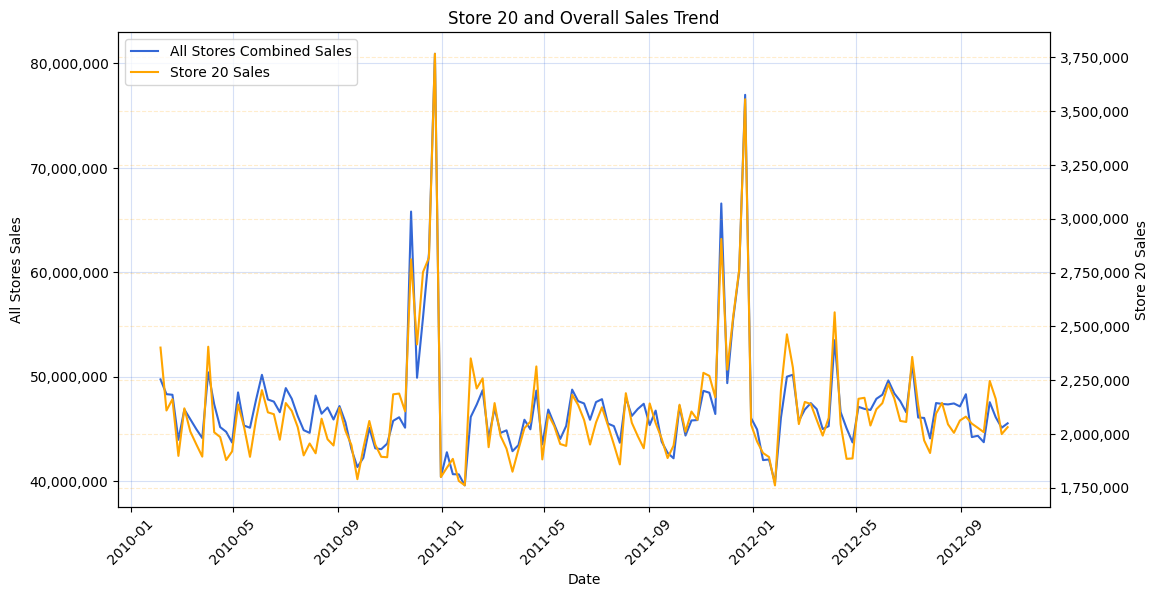

In [11]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first line chart on the left y-axis
ax1.plot(sales['Date'], sales['Weekly_Sales'], color='#3367d6', label='All Stores Combined Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('All Stores Sales', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.grid(linestyle='-', alpha=0.2, color='#3367d6')
plt.tight_layout()

# Create a second y-axis scale for the second line chart on the right side
ax2 = ax1.twinx()
ax2.plot(sales_for_store22['Date'], sales_for_store22['Weekly_Sales'], color='orange', label='Store 20 Sales')
ax2.set_ylabel('Store 20 Sales', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Format y-axis tick labels as normal numbers
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Set title
plt.title('Store 20 and Overall Sales Trend')

# Show legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.grid(linestyle='--', alpha=0.2, color='orange')

plt.show()

# If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [12]:
corr_unemp = df['Weekly_Sales'].corr(df['Unemployment'])
corr_unemp

-0.10617608965795418

In [13]:
correlation_matrix = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().unstack(level=1)['Weekly_Sales']['Unemployment']
correlation_df = pd.DataFrame(correlation_matrix)
correlation_df = correlation_df.reset_index()
correlation_df.columns = ['Store', 'Correlation']
correlation_df.head()

,Store,Correlation
0,1,-0.097955
1,2,0.066325
2,3,-0.230413
3,4,-0.337015
4,5,-0.207043


In [14]:
correlation_df.sort_values(by='Correlation', ascending=False, inplace=True)
correlation_df.reset_index(drop=True,inplace=True)
correlation_df.head()

,Store,Correlation
0,36,0.833734
1,35,0.483865
2,21,0.218367
3,14,0.210786
4,30,0.201862


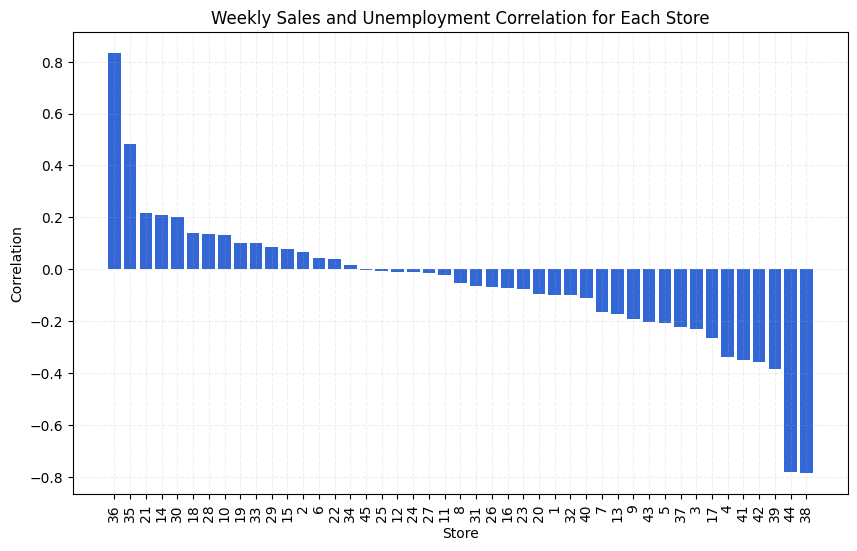

In [15]:
plt.figure(figsize=(10, 6))

plt.bar(correlation_df.index, correlation_df['Correlation'], color='#3367d6')
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.title('Weekly Sales and Unemployment Correlation for Each Store')
plt.xticks(correlation_df.index, correlation_df['Store'])  # Ensure all stores are displayed on the x-axis
plt.grid(linestyle='--', alpha=0.2)
plt.xticks(rotation=90)

plt.show()

# Does temperature affect the weekly sales in any manner?


In [16]:
corr_temp = df['Weekly_Sales'].corr(df['Temperature'])
corr_temp

-0.06381001317946956

In [17]:
correlation_matrix_temp = df.groupby('Store')[['Weekly_Sales', 'Temperature']].corr().unstack(level=1)['Weekly_Sales']['Temperature']
correlation_df_temp = pd.DataFrame(correlation_matrix_temp)
correlation_df_temp = correlation_df_temp.reset_index()
correlation_df_temp.columns = ['Store', 'Correlation']
correlation_df_temp.head()

,Store,Correlation
0,1,-0.222701
1,2,-0.297673
2,3,-0.377524
3,4,-0.225583
4,5,-0.175517


In [18]:
correlation_df_temp.sort_values(by='Correlation', ascending=False, inplace=True)
correlation_df_temp.reset_index(drop=True,inplace=True)
correlation_df_temp.head()

,Store,Correlation
0,44,0.267822
1,26,0.211722
2,16,0.182948
3,27,0.121809
4,24,0.111833


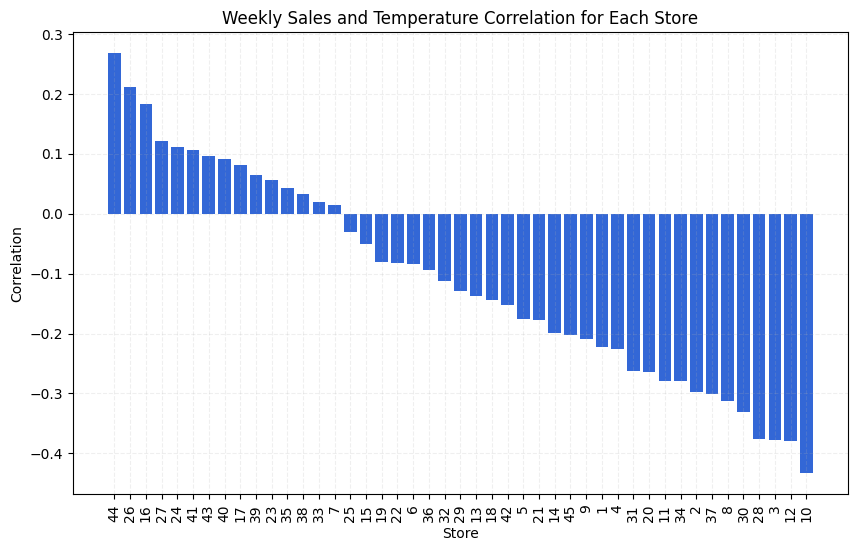

In [19]:
plt.figure(figsize=(10, 6))

plt.bar(correlation_df_temp.index, correlation_df_temp['Correlation'], color='#3367d6')
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.title('Weekly Sales and Temperature Correlation for Each Store')
plt.xticks(correlation_df_temp.index, correlation_df_temp['Store'])  # Ensure all stores are displayed on the x-axis
plt.grid(linestyle='--', alpha=0.2)
plt.xticks(rotation=90)

plt.show()

# How is the Consumer Price index affecting the weekly sales of various stores?

In [65]:
corr_cp = df['Weekly_Sales'].corr(df['CPI'])
corr_cp

-0.07263416204017628

In [21]:
correlation_matrix_cp = df.groupby('Store')[['Weekly_Sales', 'CPI']].corr().unstack(level=1)['Weekly_Sales']['CPI']
correlation_df_cp = pd.DataFrame(correlation_matrix_cp)
correlation_df_cp = correlation_df_cp.reset_index()
correlation_df_cp.columns = ['Store', 'Correlation']
correlation_df_cp.head()

,Store,Correlation
0,1,0.225408
1,2,-0.062431
2,3,0.317250
3,4,0.351157
4,5,0.308261


In [22]:
correlation_df_cp.sort_values(by='Correlation', ascending=False, inplace=True)
correlation_df_cp.reset_index(drop=True,inplace=True)
correlation_df_cp.head()

,Store,Correlation
0,38,0.812837
1,44,0.740150
2,39,0.428043
3,41,0.392293
4,42,0.360859


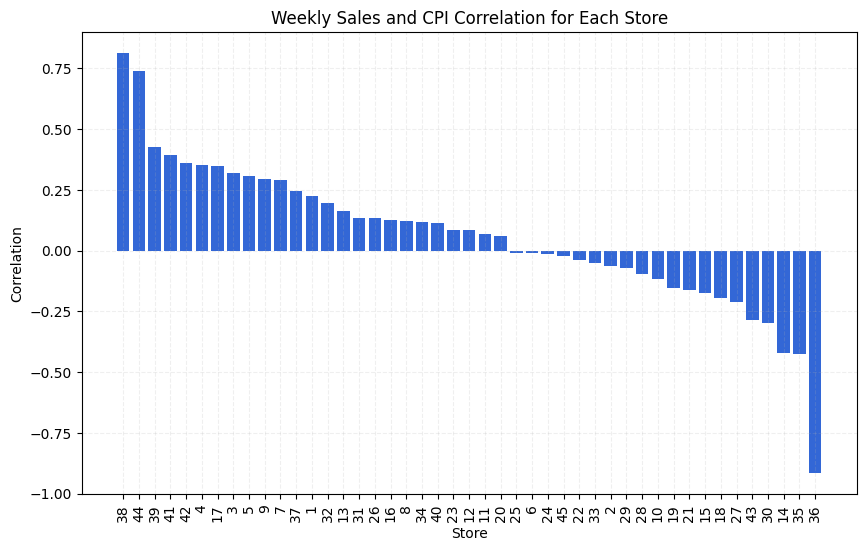

In [23]:
plt.figure(figsize=(10, 6))

plt.bar(correlation_df_cp.index, correlation_df_cp['Correlation'], color='#3367d6')
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.title('Weekly Sales and CPI Correlation for Each Store')
plt.xticks(correlation_df_cp.index, correlation_df_cp['Store'])  # Ensure all stores are displayed on the x-axis
plt.grid(linestyle='--', alpha=0.2)
plt.xticks(rotation=90)

plt.show()

# Top performing stores according to the historical data


In [24]:
Total_sale_per_store = df.groupby('Store')['Weekly_Sales'].sum()
pd.set_option('display.float_format', lambda x: '%.2f' % x) # This will convert the scientific notations of big numbers to actual big numbers
Total_sale_per_store = pd.DataFrame(Total_sale_per_store)
Total_sale_per_store = Total_sale_per_store.reset_index()
Total_sale_per_store.columns = ['Store','Total Sale']
Total_sale_per_store.head()

,Store,Total Sale
0,1,222402808.85
1,2,275382440.98
2,3,57586735.07
3,4,299543953.38
4,5,45475688.90


In [25]:
Total_sale_sorted_df = Total_sale_per_store.sort_values(by='Total Sale', ascending=False)
Total_sale_sorted_df.reset_index(drop=True,inplace=True)
Total_sale_sorted_df.head()

,Store,Total Sale
0,20,301397792.46
1,4,299543953.38
2,14,288999911.34
3,13,286517703.80
4,2,275382440.98


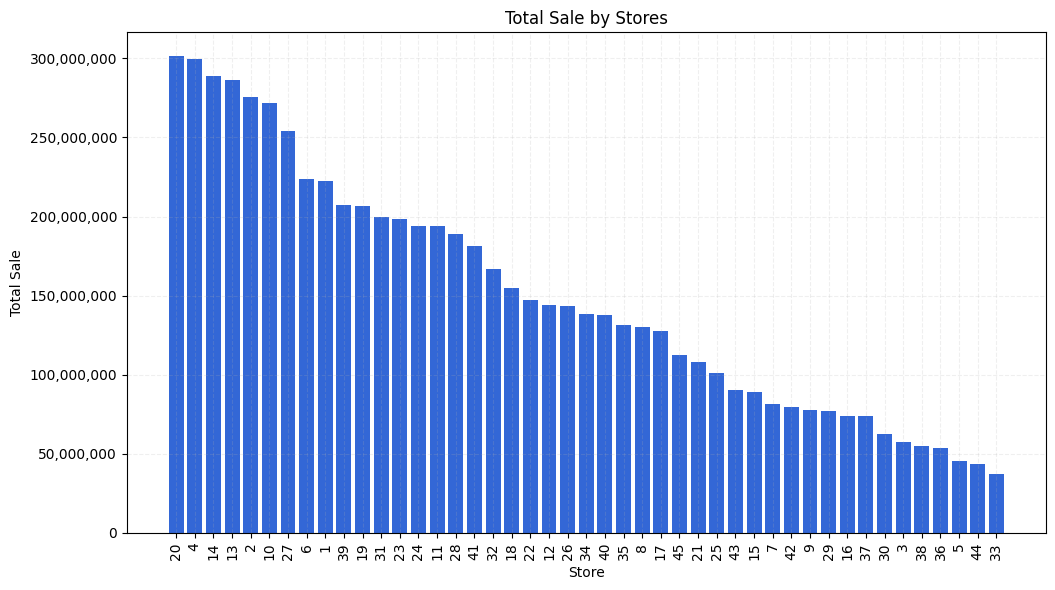

In [26]:
# Create a bar chart
plt.figure(figsize=(10, 6))

plt.bar(Total_sale_sorted_df.index, Total_sale_sorted_df['Total Sale'], color='#3367d6')
plt.xlabel('Store')
plt.ylabel('Total Sale')
plt.title('Total Sale by Stores')
plt.xticks(Total_sale_sorted_df.index, Total_sale_sorted_df['Store'])
plt.xticks(rotation=90)
plt.grid(linestyle='--', alpha=0.2)
plt.tight_layout()

# Format y-axis tick labels as normal numbers
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Show the bar chart
plt.show()

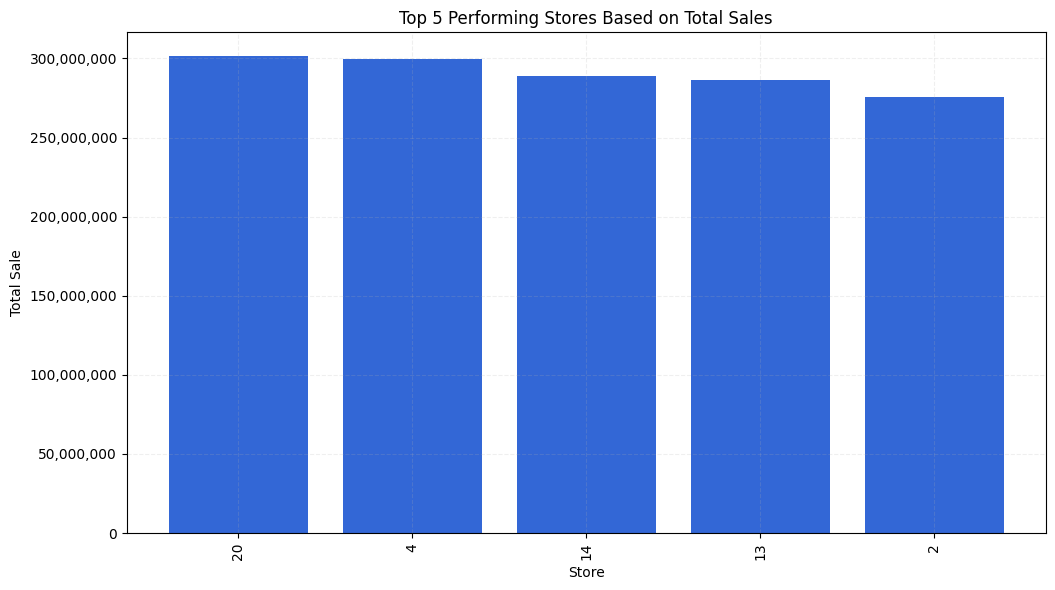

In [27]:
top_5_total = Total_sale_sorted_df.head(5)

# Create a bar chart
plt.figure(figsize=(10, 6))

plt.bar(top_5_total.index, top_5_total['Total Sale'], color='#3367d6')
plt.xlabel('Store')
plt.ylabel('Total Sale')
plt.title('Top 5 Performing Stores Based on Total Sales')
plt.xticks(top_5_total.index, top_5_total['Store'])
plt.xticks(rotation=90)
plt.grid(linestyle='--', alpha=0.2)
plt.tight_layout()

# Format y-axis tick labels as normal numbers
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Show the bar chart
plt.show()

In [28]:
Avg_sale_per_store = df.groupby('Store')['Weekly_Sales'].mean()
Avg_sale_per_store = pd.DataFrame(Avg_sale_per_store)
Avg_sale_per_store = Avg_sale_per_store.reset_index()
Avg_sale_per_store.columns = ['Store','Avg Sale']
Avg_sale_per_store.head()

,Store,Avg Sale
0,1,1555264.40
1,2,1925751.34
2,3,402704.44
3,4,2094712.96
4,5,318011.81


In [29]:
Avg_sale_sorted_df = Avg_sale_per_store.sort_values(by='Avg Sale', ascending=False)
Avg_sale_sorted_df.reset_index(drop=True,inplace=True)
Avg_sale_sorted_df.head()

,Store,Avg Sale
0,20,2107676.87
1,4,2094712.96
2,14,2020978.40
3,13,2003620.31
4,2,1925751.34


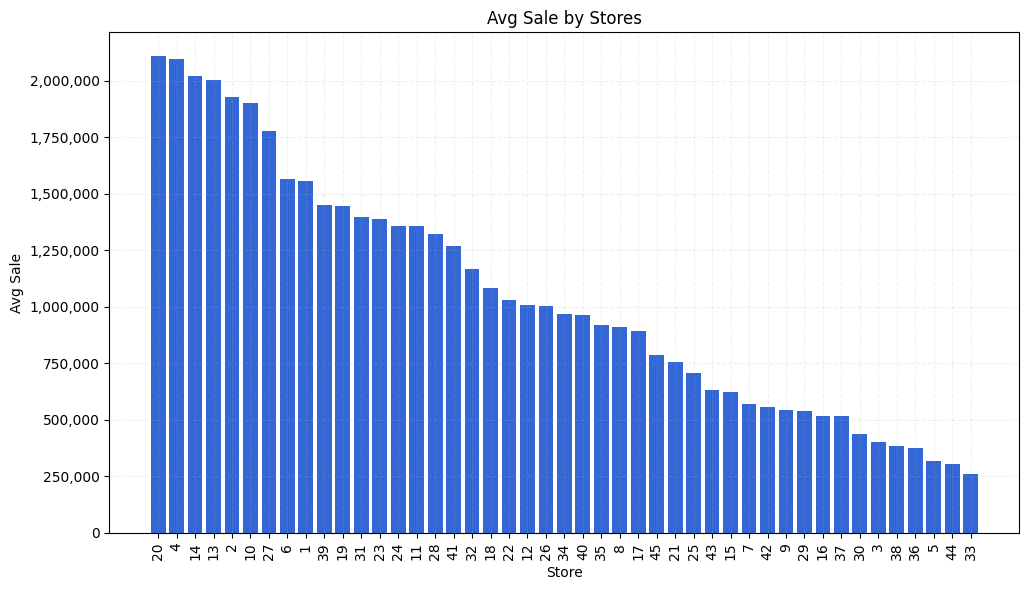

In [30]:
# Create a bar chart
plt.figure(figsize=(10, 6))

plt.bar(Avg_sale_sorted_df.index, Avg_sale_sorted_df['Avg Sale'], color='#3367d6')
plt.xlabel('Store')
plt.ylabel('Avg Sale')
plt.title('Avg Sale by Stores')
plt.xticks(Avg_sale_sorted_df.index, Avg_sale_sorted_df['Store'])
plt.xticks(rotation=90)
plt.grid(linestyle='--', alpha=0.2)
plt.tight_layout()

# Format y-axis tick labels as normal numbers
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Show the bar chart
plt.show()

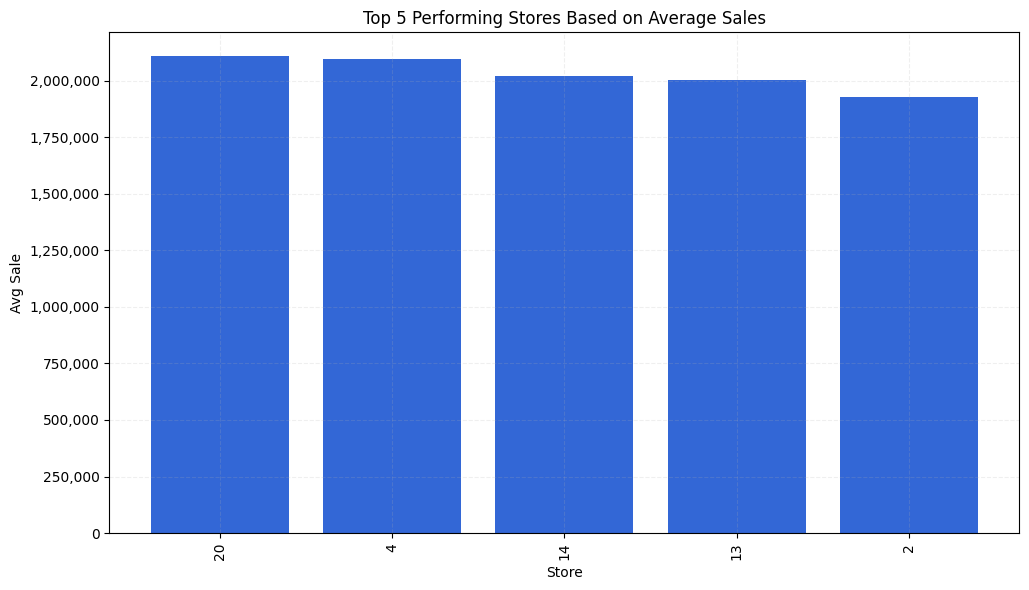

In [31]:
top_5_avg = Avg_sale_sorted_df.head(5)

# Create a bar chart
plt.figure(figsize=(10, 6))

plt.bar(top_5_avg.index, top_5_avg['Avg Sale'], color='#3367d6')
plt.xlabel('Store')
plt.ylabel('Avg Sale')
plt.title('Top 5 Performing Stores Based on Average Sales')
plt.xticks(top_5_avg.index, top_5_avg['Store'])
plt.xticks(rotation=90)
plt.grid(linestyle='--', alpha=0.2)
plt.tight_layout()

# Format y-axis tick labels as normal numbers
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Show the bar chart
plt.show()

# The worst performing store, and how significant is the difference between the highest and lowest performing stores

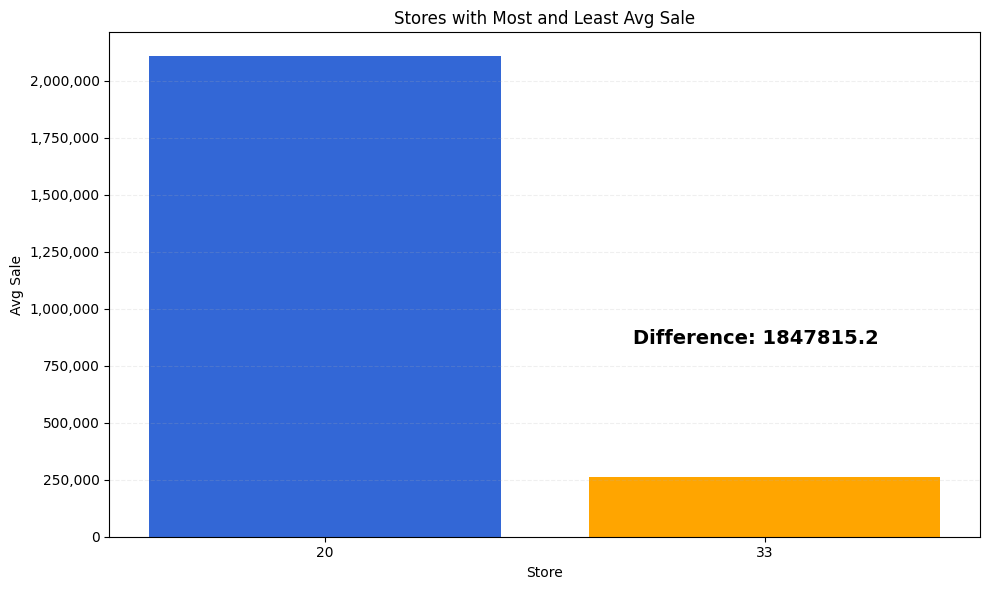

In [32]:
most_total_sale = Avg_sale_sorted_df.iloc[0]
least_total_sale = Avg_sale_sorted_df.iloc[-1]

difference = most_total_sale['Avg Sale'] - least_total_sale['Avg Sale']

# Create a bar chart with two bars
plt.figure(figsize=(10, 6))
bars = plt.bar([0, 1], [most_total_sale['Avg Sale'], least_total_sale['Avg Sale']], color=['#3367d6', 'orange'])
plt.xticks([0, 1], [int(most_total_sale['Store']),int(least_total_sale['Store'])])
plt.xlabel('Store')
plt.ylabel('Avg Sale')
plt.title('Stores with Most and Least Avg Sale')
plt.grid(axis='y', linestyle='--', alpha=0.2)

# Format y-axis tick labels as normal numbers
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Add text annotation for the difference
plt.text(0.7, (most_total_sale['Avg Sale'] + least_total_sale['Avg Sale']) / 2.8,f'Difference: {difference:.1f}', ha='left', fontsize=14, fontweight='bold')


plt.tight_layout()

# Show the bar chart
plt.show()

In [33]:
store20 = df[df['Store']==20]
store20

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2717,20,2010-02-05,2401395.47,0,25.92,2.78,204.25,8.19
2718,20,2010-02-12,2109107.90,1,22.12,2.77,204.39,8.19
2719,20,2010-02-19,2161549.76,0,25.43,2.75,204.43,8.19
2720,20,2010-02-26,1898193.95,0,32.32,2.75,204.46,8.19
2721,20,2010-03-05,2119213.72,0,31.75,2.78,204.49,8.19
...,...,...,...,...,...,...,...,...
2855,20,2012-09-28,2008350.58,0,58.65,4.00,215.74,7.28
2856,20,2012-10-05,2246411.89,0,60.77,3.98,215.93,7.29
2857,20,2012-10-12,2162951.36,0,47.20,4.00,216.12,7.29
2858,20,2012-10-19,1999363.49,0,56.26,3.97,216.15,7.29


In [34]:
store20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 2717 to 2859
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         143 non-null    int64         
 1   Date          143 non-null    datetime64[ns]
 2   Weekly_Sales  143 non-null    float64       
 3   Holiday_Flag  143 non-null    int64         
 4   Temperature   143 non-null    float64       
 5   Fuel_Price    143 non-null    float64       
 6   CPI           143 non-null    float64       
 7   Unemployment  143 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 10.1 KB


In [35]:
ts_df = store20[['Date', 'Weekly_Sales']].set_index('Date')
ts_df.sort_index(inplace=True)
ts_df

,Weekly_Sales
Date,
2010-02-05,2401395.47
2010-02-12,2109107.90
2010-02-19,2161549.76
2010-02-26,1898193.95
2010-03-05,2119213.72
...,...
2012-09-28,2008350.58
2012-10-05,2246411.89
2012-10-12,2162951.36


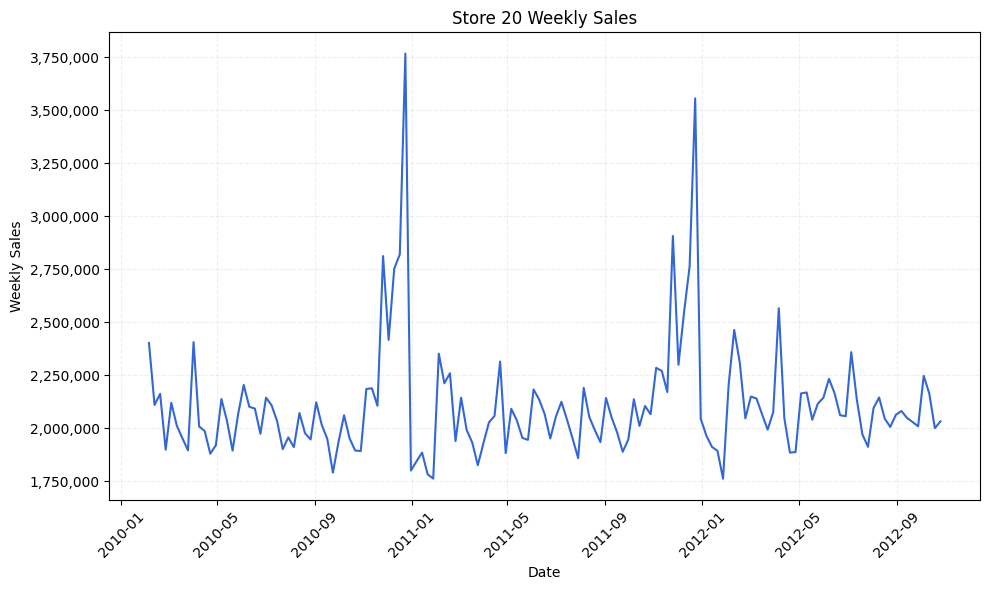

In [36]:
plt.figure(figsize=(10, 6))

# Plot the line graph
plt.plot(ts_df['Weekly_Sales'], color='#3367d6')

# labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Store 20 Weekly Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format y-axis tick labels as normal numbers
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Show the plot
plt.grid(linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

In [37]:
duration_var = 12
p_var = 1
d_var = 0
q_var = duration_var
s_var = 52

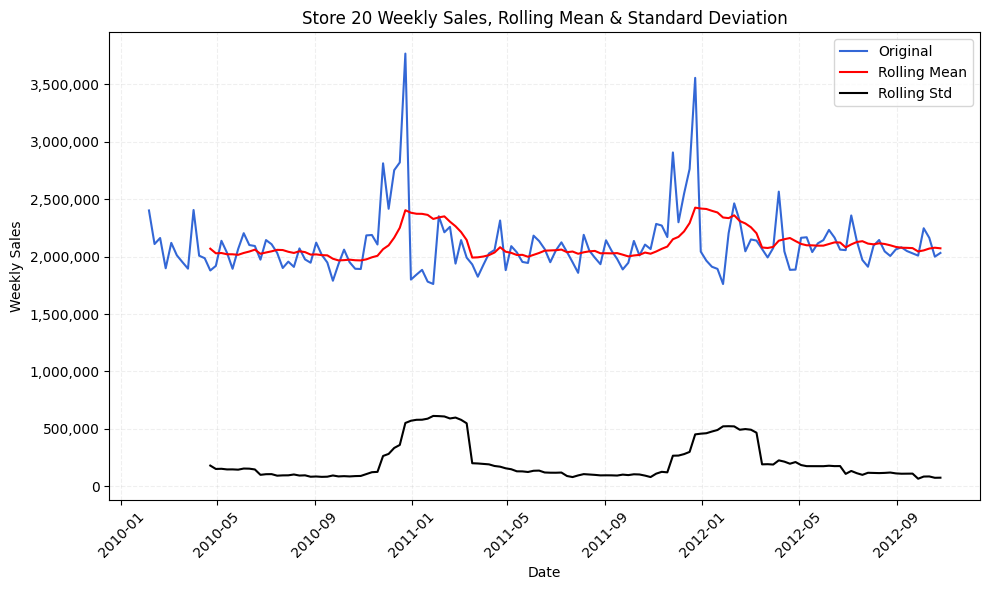

In [38]:
mean_log1 = ts_df.rolling(window=duration_var).mean()  
std_log1 = ts_df.rolling(window=duration_var).std()    

plt.figure(figsize=(10, 6))

# Plot the line graph
plt.plot(ts_df, color='#3367d6', label='Original')
plt.plot(mean_log1, color='red', label='Rolling Mean')
plt.plot(std_log1, color='black', label='Rolling Std')

# labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Store 20 Weekly Sales, Rolling Mean & Standard Deviation')
plt.legend(loc='best')
plt.xticks(rotation=45)

# Format y-axis tick labels as normal numbers
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Show the plot
plt.grid(linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

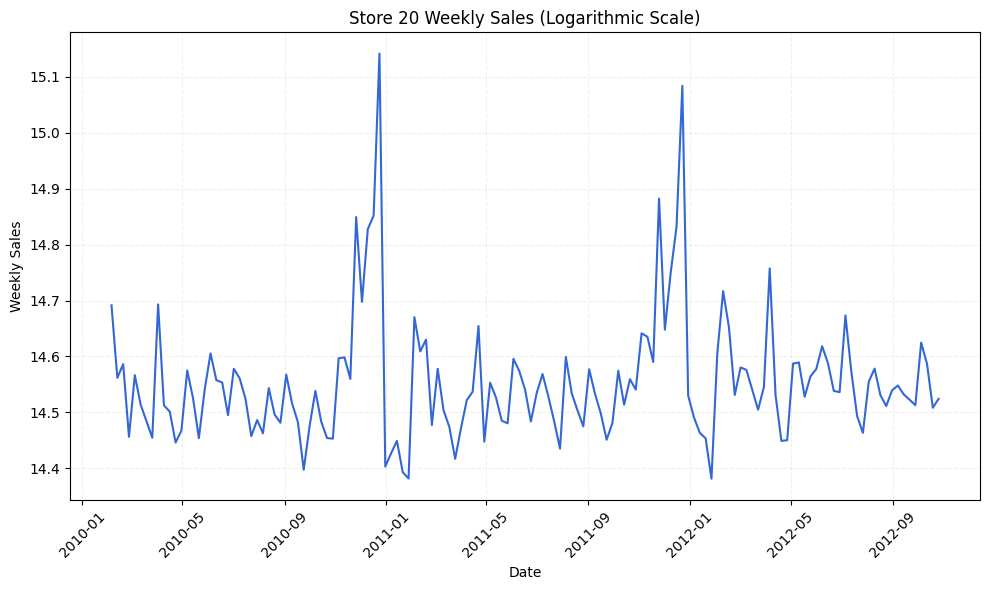

In [39]:
first_log = np.log(ts_df)

plt.figure(figsize=(10, 6))

# Plot the line graph
plt.plot(first_log, color='#3367d6')

# labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Store 20 Weekly Sales (Logarithmic Scale)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

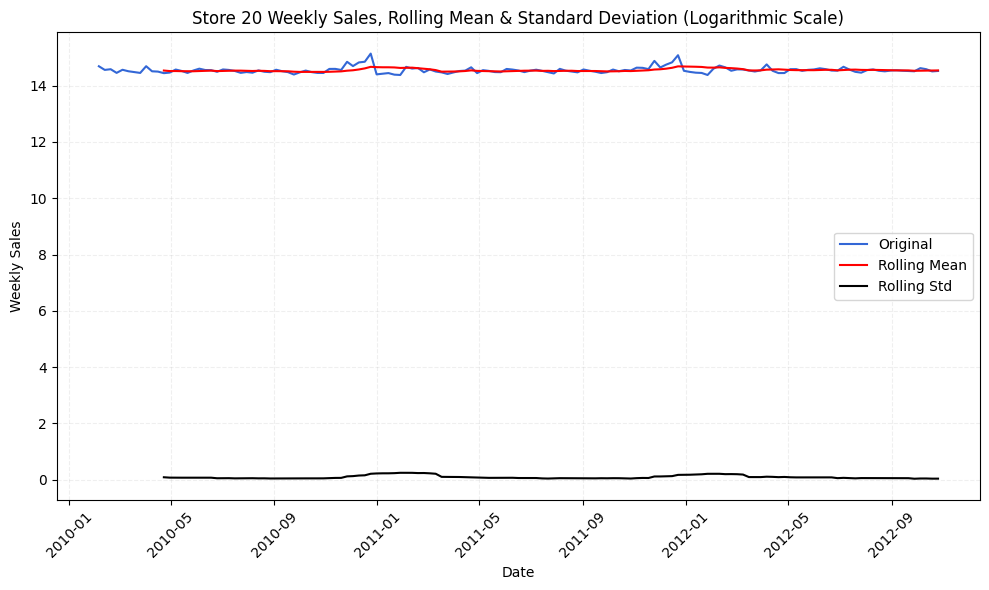

In [40]:
mean_log2 = first_log.rolling(window=duration_var).mean() 
std_log2 = first_log.rolling(window=duration_var).std() 

plt.figure(figsize=(10, 6))

# Plot the line graph
plt.plot(first_log, color='#3367d6', label='Original')
plt.plot(mean_log2, color='red', label='Rolling Mean')
plt.plot(std_log2, color='black', label='Rolling Std')

# labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Store 20 Weekly Sales, Rolling Mean & Standard Deviation (Logarithmic Scale)')
plt.legend(loc='best')
plt.xticks(rotation=45)

# Show the plot
plt.grid(linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

In [41]:
new_data = first_log - mean_log2
new_data = new_data.dropna()
new_data.head()

,Weekly_Sales
Date,
2010-04-23,-0.09
2010-04-30,-0.05
2010-05-07,0.05
2010-05-14,0.01
2010-05-21,-0.06


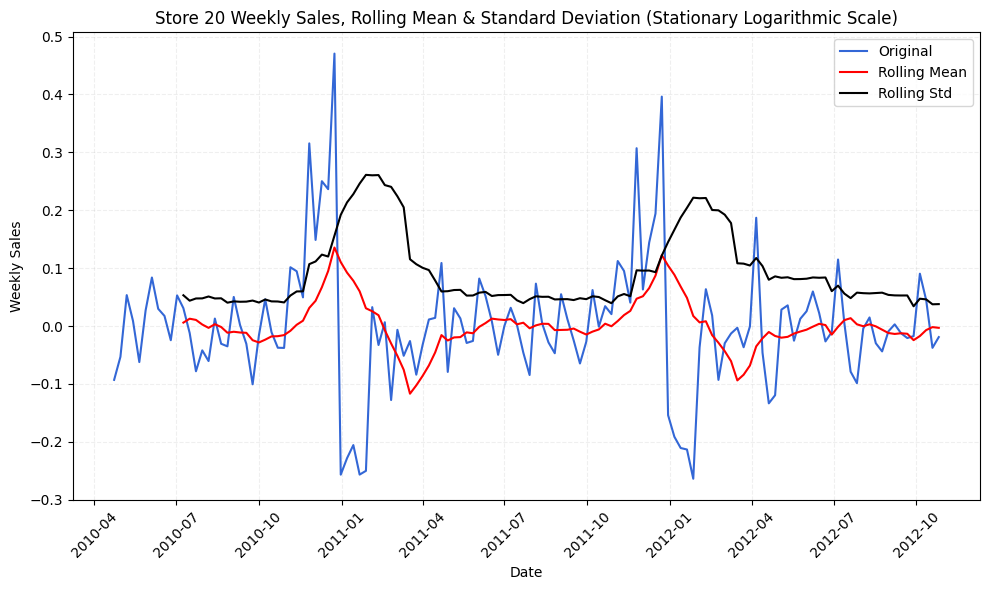

In [42]:
mean_log3 = new_data.rolling(window=duration_var).mean()
std_log3 = new_data.rolling(window=duration_var).std()

plt.figure(figsize=(10, 6))

# Plot the line graph
plt.plot(new_data, color='#3367d6', label='Original')
plt.plot(mean_log3, color='red', label='Rolling Mean')
plt.plot(std_log3, color='black', label='Rolling Std')

# labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Store 20 Weekly Sales, Rolling Mean & Standard Deviation (Stationary Logarithmic Scale)')
plt.legend(loc='best')
plt.xticks(rotation=45)

# Show the plot
plt.grid(linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

In [43]:
result = adfuller(new_data['Weekly_Sales'])
p_value=result[1]
p_value

2.306199963175609e-07

In [44]:
#iterpret the p value
if p_value <=0.05:
    print('Stationarity is present')
else:
    print('NO Stationarity is present')

Stationarity is present


# Does the weekly sales show a seasonal trend, when and what could be the reason?

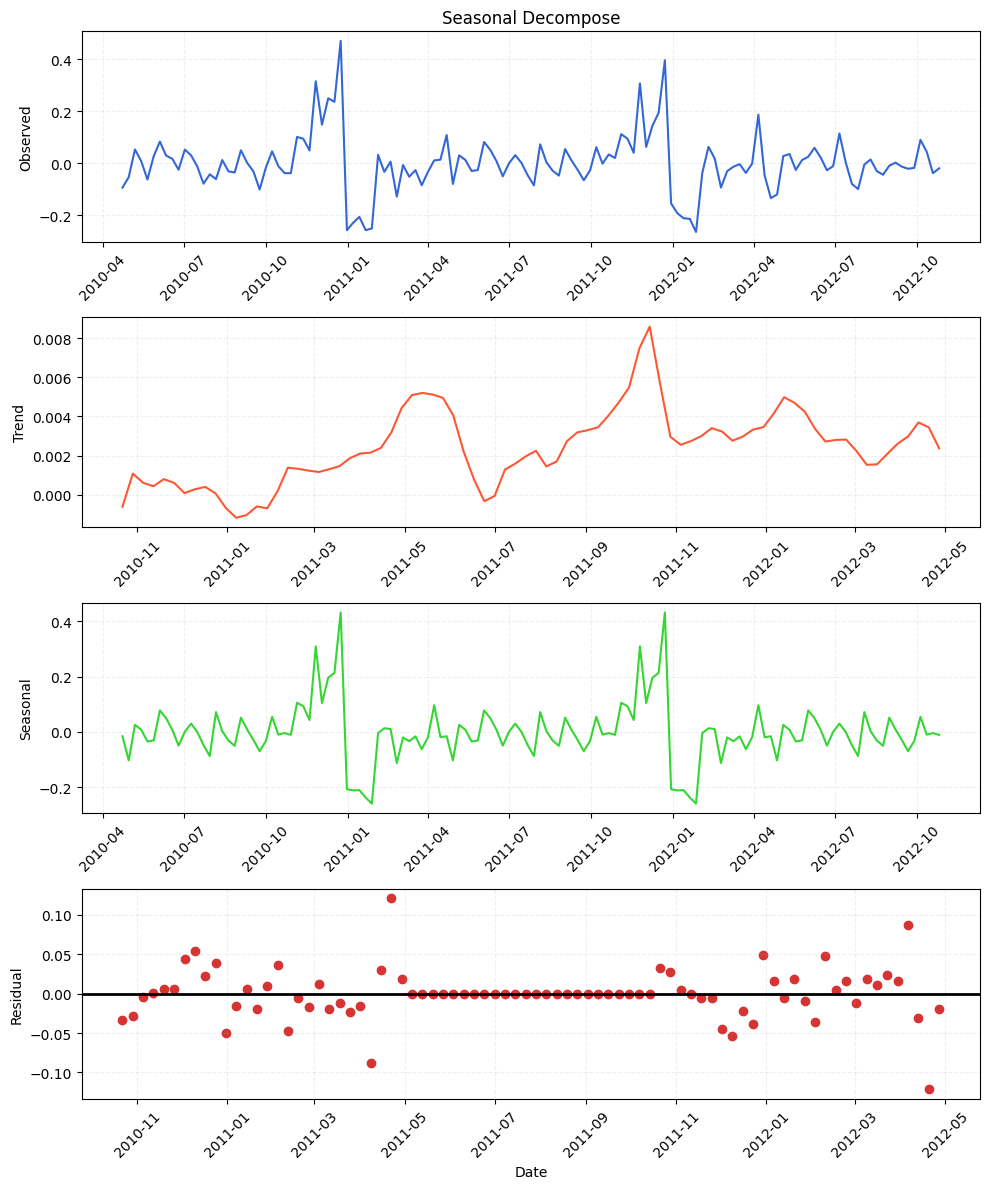

In [64]:
#seasonal Decompose

decompose_result = seasonal_decompose(new_data.Weekly_Sales,period=s_var)

plt.figure(figsize=(10, 12))

plt.subplot(411)
plt.plot(decompose_result.observed, color='#3367d6', label='Original')
plt.ylabel('Observed')
plt.title('Seasonal Decompose')
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.2)

plt.subplot(412)
plt.plot(decompose_result.trend, color='#ff5733', label='Trend')
plt.ylabel('Trend')
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.2)

plt.subplot(413)
plt.plot(decompose_result.seasonal, color='#33d633', label='Seasonal')
plt.ylabel('Seasonal')
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.2)

plt.subplot(414)
plt.scatter(new_data.index, decompose_result.resid, color='#d63333', label='Residual')
plt.ylabel('Residual')
plt.xlabel('Date')
plt.axhline(0, color='black', linewidth=2, linestyle='-')
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

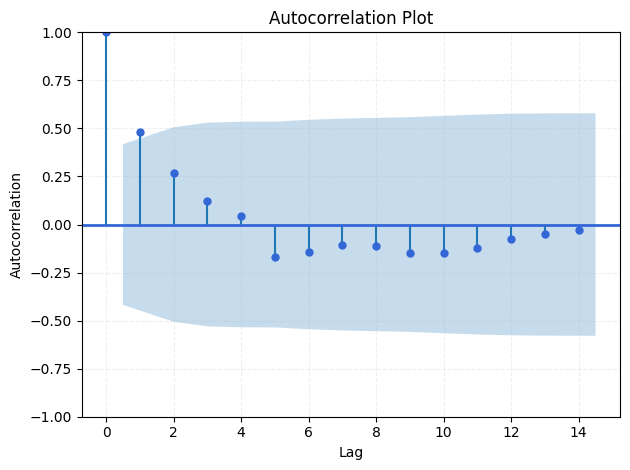

In [46]:
# Calculate autocorrelation
acf_plot = acf(new_data)

# Plot autocorrelation
plt.figure(figsize=(10, 6))
plot_acf(acf_plot, color='#3367d6', linewidth=2)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

In [47]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2010-04-23 to 2012-10-26
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [48]:
train = new_data.iloc[:108]['Weekly_Sales']
test = new_data.iloc[109:]['Weekly_Sales']

model = ARIMA(train, order=(p_var,d_var,q_var))  #(p,d,q),p=autoregressive,d=differencing,q=moving average
ARIMA_model = model.fit()

C:\Users\coolc\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\coolc\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\coolc\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\coolc\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


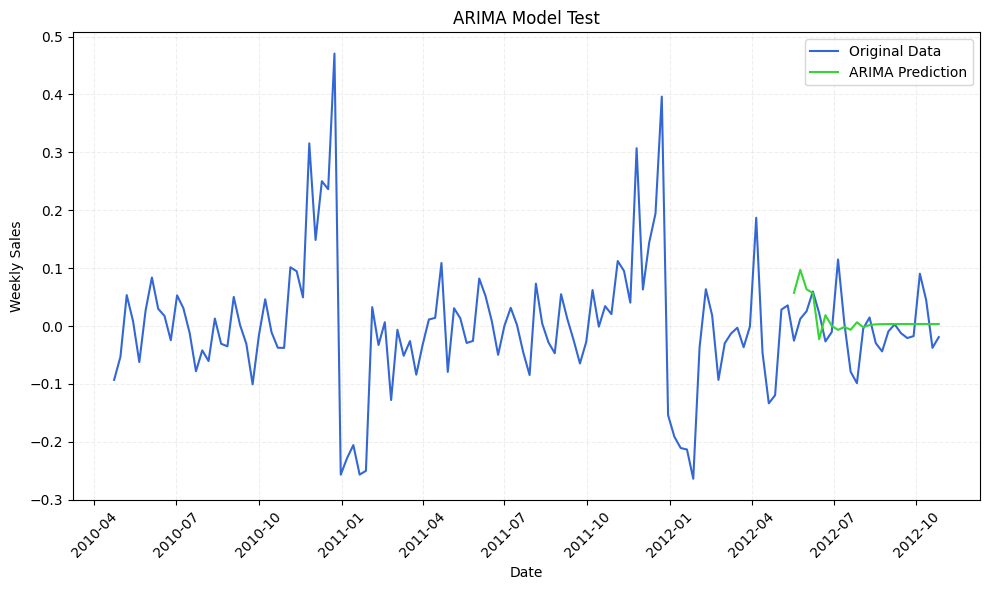

In [49]:
new_data['ARIMA_predict'] = ARIMA_model.predict(start= len(train), end=len(train)+len(test), dynamic=True)

plt.figure(figsize=(10, 6))

# Plot the line graph
plt.plot(new_data['Weekly_Sales'], color='#3367d6', label='Original Data')
plt.plot(new_data['ARIMA_predict'], color='#33d633', label='ARIMA Prediction')

# labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('ARIMA Model Test')
plt.legend(loc='best')
plt.xticks(rotation=45)

# Show the plot
plt.grid(linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

In [50]:
model = SARIMAX(train, order=(p_var,d_var,q_var), seasonal_order=(p_var,d_var,q_var,s_var))
SARIMA_model = model.fit()

C:\Users\coolc\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\coolc\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\coolc\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


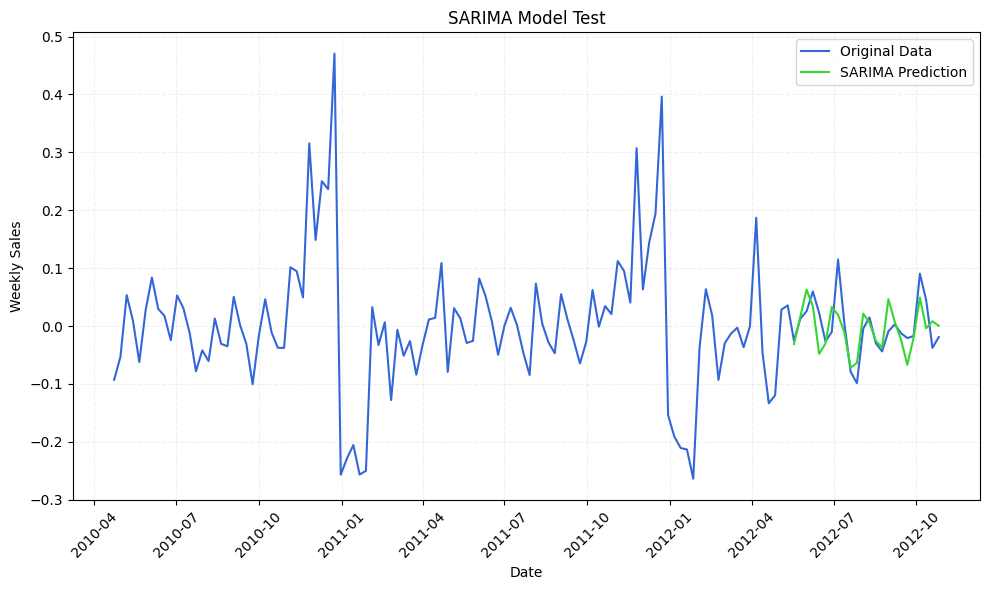

In [51]:
new_data['SARIMA_predict'] = SARIMA_model.predict(start= len(train), end=len(train)+len(test), dynamic=True)

plt.figure(figsize=(10, 6))

# Plot the line graph
plt.plot(new_data['Weekly_Sales'], color='#3367d6', label='Original Data')
plt.plot(new_data['SARIMA_predict'], color='#33d633', label='SARIMA Prediction')

# labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('SARIMA Model Test')
plt.legend(loc='best')
plt.xticks(rotation=45)

# Show the plot
plt.grid(linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

In [52]:
ARIMA_forecast = ARIMA_model.get_forecast(steps=len(test))
SARIMA_forecast = SARIMA_model.get_forecast(steps=len(test))

# Calculate Mean Squared Error (MSE) to evaluate model accuracy
ARIMA_mse = mean_squared_error(test, ARIMA_forecast.predicted_mean)
SARIMA_mse = mean_squared_error(test, SARIMA_forecast.predicted_mean)
print("ARIMA MSE:", round(ARIMA_mse,6))
print("SARIMA MSE:", round(SARIMA_mse,6))

ARIMA MSE: 0.002323
SARIMA MSE: 0.001748


# Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

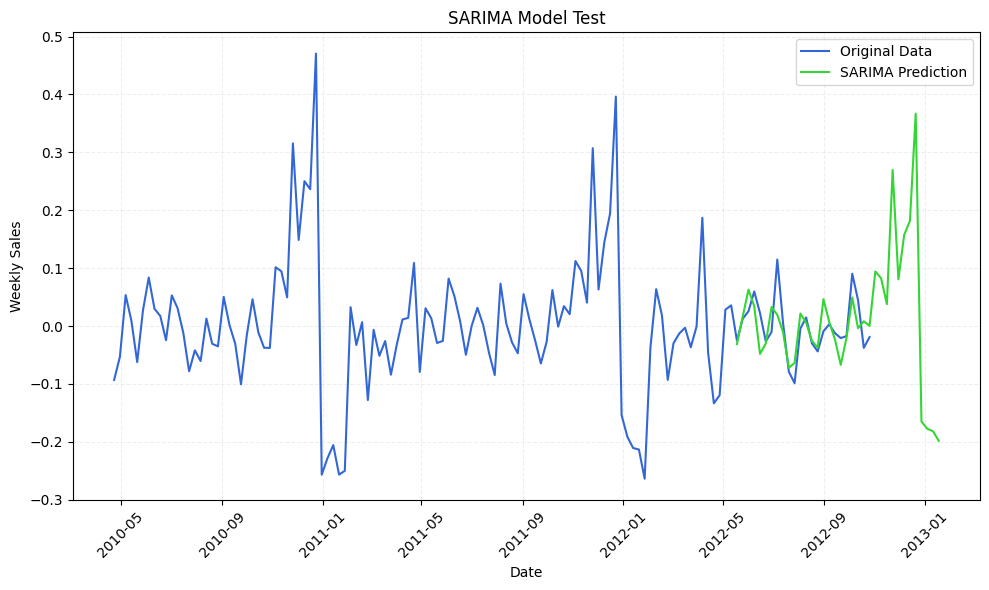

In [53]:
#predicting the projections for the next 12 weeks
forecast = SARIMA_model.forecast(steps=36) 
#24+52=76, 24 weeks cover the testing timeframe and the 12 for the 12 week prediction

plt.figure(figsize=(10, 6))

# Plot the line graph
plt.plot(new_data['Weekly_Sales'], color='#3367d6', label='Original Data')
plt.plot(forecast, color='#33d633', label='SARIMA Prediction')

# labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('SARIMA Model Test')
plt.legend(loc='best')
plt.xticks(rotation=45)

# Show the plot
plt.grid(linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()